In [10]:
from __future__ import annotations
from typing import Tuple, List


class Hex:
    def __init__(self, q: int, r: int, s: int):
        assert q + r + s == 0, f"q + r + s must be 0, got {q} + {r} + {s}"
        self.q = q
        self.r = r
        self.s = s

    def __add__(self, other: Hex):
        return Hex(self.q + other.q, self.r + other.r, self.s + other.s)

    def __sub__(self, other: Hex):
        return Hex(self.q - other.q, self.r - other.r, self.s - other.s)

    def __eq__(self, other: Hex):
        return self.q == other.q and self.r == other.r and self.s == other.s

    def __ne__(self, other: Hex):
        return not self.__eq__(other)

    def __str__(self):
        return f"Hex({self.q}, {self.r}, {self.s})"

    def __repr__(self):
        return self.__str__()

    def hex2xy(self, k: float) -> Tuple[float, float]:
        return k * (self.q + self.r / 2), k * (self.r * pow(3, 0.5) / 2)

    def length(self) -> int:
        return (abs(self.q) + abs(self.r) + abs(self.s)) // 2

    def distance(self, other: Hex) -> int:
        return self.__sub__(other).length()

    @staticmethod
    def xy2hex(x: float, y: float, k: float) -> Hex:
        r = round(y * 2.0 / (k * pow(3, 0.5)))
        q = round(x / k - r / 2)
        return Hex(q, r, -q - r)

    @staticmethod
    def round(q: float, r: float, s: float) -> Hex:
        qi = int(round(q))
        ri = int(round(r))
        si = int(round(s))
        q_diff = abs(qi - q)
        r_diff = abs(ri - r)
        s_diff = abs(si - s)
        if q_diff > r_diff and q_diff > s_diff:
            qi = -ri - si
        elif r_diff > s_diff:
            ri = -qi - si
        else:
            si = -qi - ri
        return Hex(qi, ri, si)

    @staticmethod
    def lerp(
        a_q: float, a_r: float, a_s: float, b_q: float, b_r: float, b_s: float, t: float
    ) -> Hex:
        return Hex.round(
            a_q * (1.0 - t) + b_q * t,
            a_r * (1.0 - t) + b_r * t,
            a_s * (1.0 - t) + b_s * t,
        )

    @staticmethod
    def linedraw(a: Hex, b: Hex) -> List[Hex]:
        N = a.distance(b)
        a_nudge_q, a_nudge_r, a_nudge_s = a.q + 1e-06, a.r + 1e-06, a.s - 2e-06
        b_nudge_q, b_nudge_r, b_nudge_s = b.q + 1e-06, b.r + 1e-06, b.s - 2e-06
        results = []
        step = 1.0 / max(N, 1)
        for i in range(0, N + 1):
            results.append(
                Hex.lerp(
                    a_nudge_q,
                    a_nudge_r,
                    a_nudge_s,
                    b_nudge_q,
                    b_nudge_r,
                    b_nudge_s,
                    step * i,
                )
            )
        return results

    @staticmethod
    def equal_hex_array(a: List[Hex], b: List[Hex]) -> bool:
        if len(a) != len(b):
            return False
        return all(ai == bi for ai, bi in zip(a, b))


assert Hex.equal_hex_array(
    [
        Hex(0, 0, 0),
        Hex(0, -1, 1),
        Hex(0, -2, 2),
        Hex(1, -3, 2),
        Hex(1, -4, 3),
        Hex(1, -5, 4),
    ],
    Hex.linedraw(Hex(0, 0, 0), Hex(1, -5, 4)),
)

Hex(0, 5, -5)


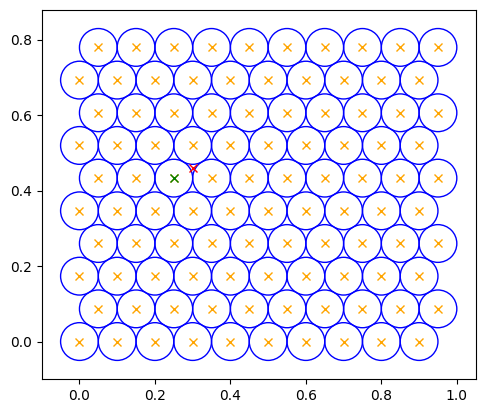

In [19]:
import time
from typing import List, Tuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy as sp
import scipy.optimize
import scipy.sparse
from networkx.drawing.layout import _process_params
from tqdm.auto import tqdm

from src.python.cost import calcCost
from src.python.vis.visGraph import visGraph

# https://www.redblobgames.com/grids/hexagons/


fig, ax = plt.subplots()
ax.set_aspect("equal")

n = 100
k = 1 / pow(n, 0.5)

points = []
for r in range(0, int(2 / (k * pow(3, 0.5))) + 100):
    for q in range(-(r // 2), int(1 / k) - (r // 2)):
        h = Hex(q, r, -q - r)
        points.append(h)
        if len(points) == n:
            break
    if len(points) == n:
        break

for h in points:
    x, y = h.hex2xy(k)
    ax.plot(x, y, "x", color="orange")
    circle = plt.Circle((x, y), k / 2, color="blue", fill=False)
    ax.add_artist(circle)
x = 0.30
y = 0.46
ax.plot(x, y, "x", color="red")
hex0 = Hex.xy2hex(x, y, k)
print(hex0)
ax.plot(*hex0.hex2xy(k), "x", color="green")
plt.xlim(
    min(h.hex2xy(k)[0] for h in points) - k, max(h.hex2xy(k)[0] for h in points) + k
)
plt.ylim(
    min(h.hex2xy(k)[1] for h in points) - k, max(h.hex2xy(k)[1] for h in points) + k
)
plt.show()

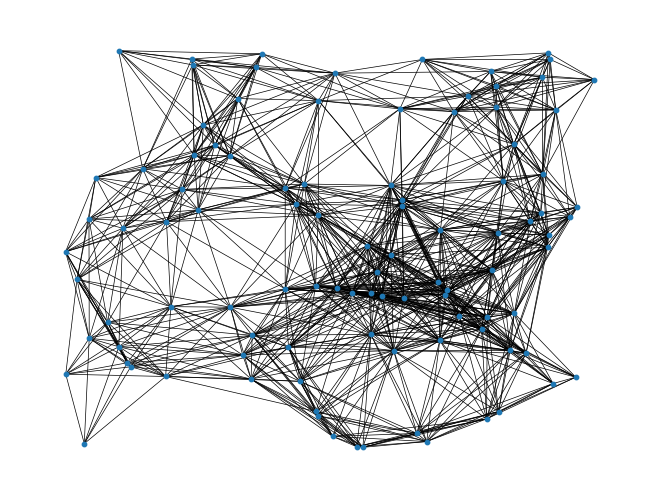

In [15]:
G = nx.random_geometric_graph(100, 0.3, seed=0)

pos = np.array([G.nodes[i]["pos"] for i in G.nodes])
nx.draw(G, pos, node_size=10, width=0.5)
plt.show()

dim = 2
G, center = _process_params(G, None, dim)

A = nx.to_scipy_sparse_array(G, dtype="f")
n = G.number_of_nodes()
nodes = np.arange(n)
np.random.shuffle(nodes)
A = A[nodes][:, nodes]
k = 1 / np.sqrt(n)
A = scipy.sparse.coo_matrix(A)
assert np.all(A.data >= 0)

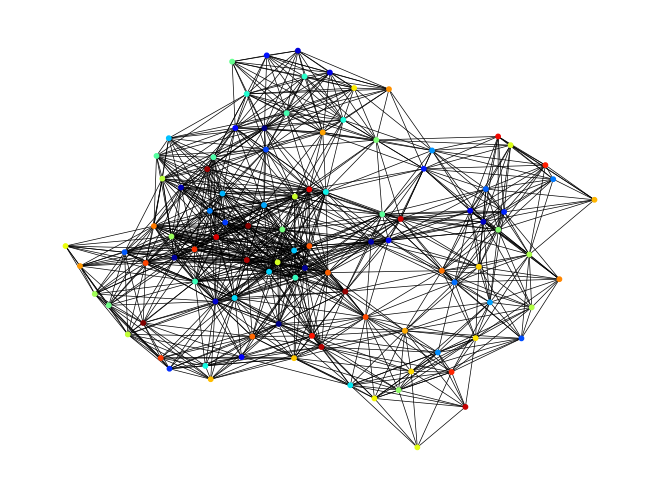

In [16]:
pos = nx.kamada_kawai_layout(G)
visGraph(G, pos, node_size=10, width=0.5)

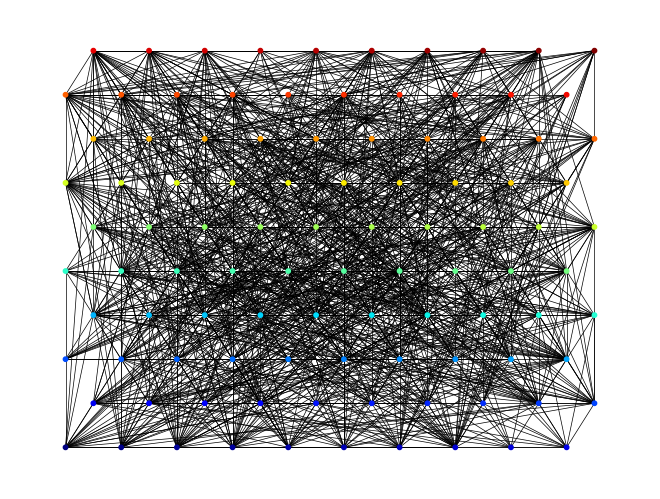

NameError: name 'toHexagon' is not defined

In [17]:
import random


def points2pos(points: List[Hex], k: float) -> np.ndarray:
    return np.array([h.xy(k) for h in points])


visGraph(G, points2pos(points, k), node_size=10, width=0.5)